# Problem Set 0: Images as Functions
## Setup

In [1]:
# IPython magic
%load_ext autoreload
%autoreload 2
# Matplotlib magic
%matplotlib inline

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Matplotlib params
plt.rcParams['figure.figsize'] = (14.0, 6.0)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## 1. Input Images

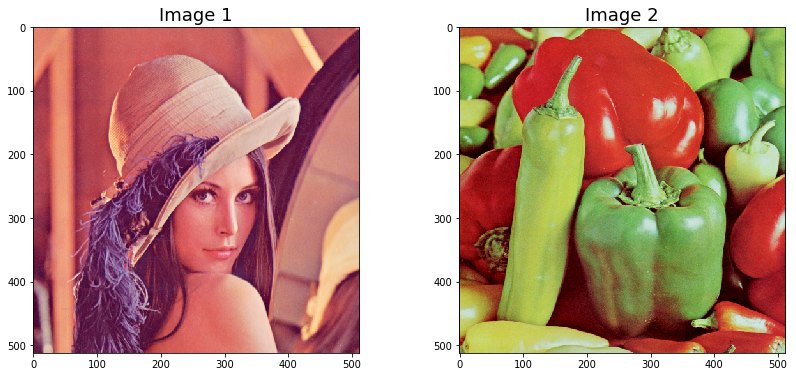

In [3]:
# Load images
img1 = cv2.imread('lena512color.tiff')
img2 = cv2.imread('peppers.tiff')
# OpenCV BGR to RGB
img1 = img1[:,:,::-1]
img2 = img2[:,:,::-1]
# Plot
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].set_title('Image 1')
ax[0].imshow(img1)
ax[1].set_title('Image 2')
ax[1].imshow(img2)

## 2. Colour Planes
### a. Swap red and blue pixels

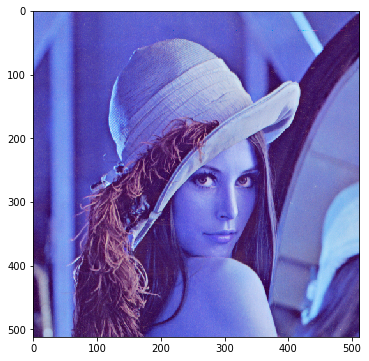

In [4]:
# Swap red and blue channels
img1_rb_swapped = img1[:, :, [2, 1, 0]].copy()
plt.imshow(img1_rb_swapped)

### b. Green channel

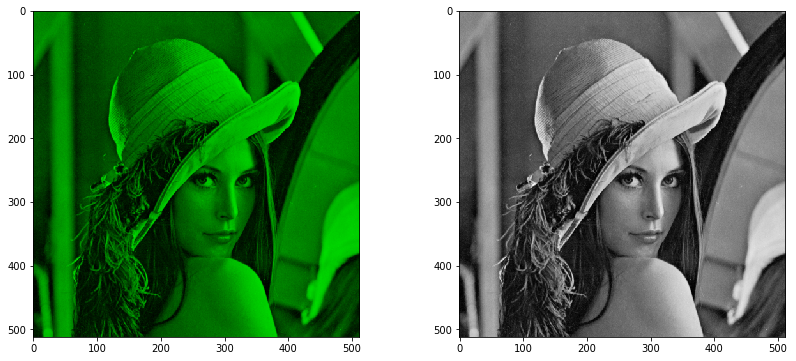

In [5]:
# Extract green channel
img1_green = img1.copy()
img1_green[:, :, [0, 2]] = 0
img1_green_gs = img1[:, :, 1].copy()
# Plot
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img1_green)
ax[1].imshow(img1_green_gs)

### c. Red channel

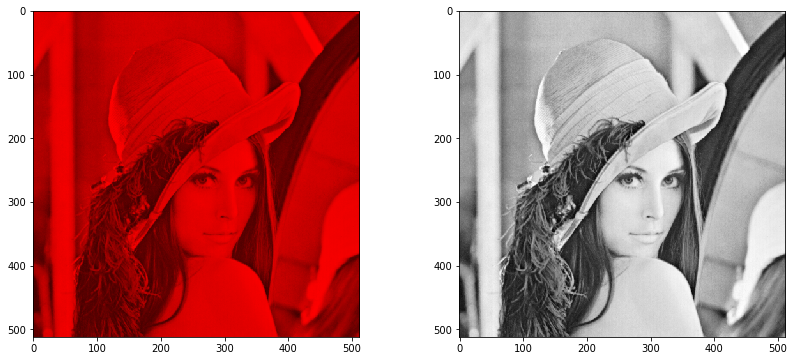

In [6]:
# Extract red channel
img1_red = img1.copy()
img1_red[:, :, [1, 2]] = 0
img1_red_gs = img1[:, :, 0].copy()
# Plot
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img1_red)
ax[1].imshow(img1_red_gs)

### d. Which looks better?
The monochrome image extracted from the green channel seems to have more dynamic range than the image from the red channel. Hence, it would be more suitable for Computer Vision algorithms.

## 3. Pixel Replacement

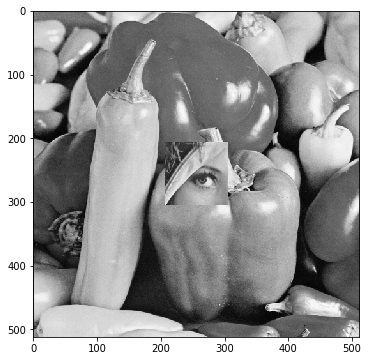

In [7]:
# Convert to grayscale
img1_gs = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img2_gs = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
# Central subimage coordinates
offset = 50
subimage_y = img1_gs.shape[0] // 2 - offset, img1_gs.shape[0] // 2 + offset
subimage_x = img1_gs.shape[1] // 2 - offset, img1_gs.shape[1] // 2 + offset
# Replace subimage in Image 2
img2_gs[subimage_y[0]: subimage_y[1], subimage_x[0]: subimage_x[1]] = img1_gs[subimage_y[0]: subimage_y[1], subimage_x[0]: subimage_x[1]]

plt.imshow(img2_gs)

## 4. Arithmetic and Geometric operations
### a. Image properties

In [8]:
print("{:44}{}".format("Minimum pixel value of M1g:", img1_green_gs.min()))
print("{:44}{}".format("Maximum pixel value of M1g:", img1_green_gs.max()))
print("{:44}{}".format("Mean of pixel values of M1g:", img1_green_gs.mean()))
print("{:44}{}".format("Standard Deviation of pixel values of M1g:", img1_green_gs.std()))

Minimum pixel value of M1g:                 3
Maximum pixel value of M1g:                 248
Mean of pixel values of M1g:                99.05121612548828
Standard Deviation of pixel values of M1g:  52.87751732904626


### b. Normalization

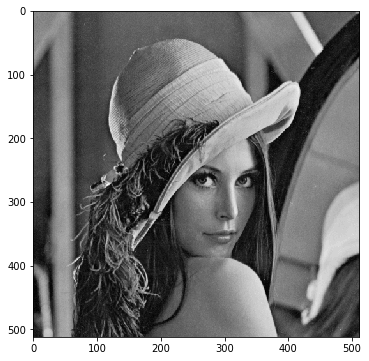

In [9]:
img1_green_norm = img1_green_gs.copy()
img1_green_mean = img1_green_norm.mean()
# Normalize
img1_green_norm = 10 * (img1_green_norm - img1_green_mean) / img1_green_norm.std()
img1_green_norm += img1_green_mean
# Convert to uint8
img1_green_norm = img1_green_norm.astype(int)
img1_green_norm = img1_green_norm.clip(0, 255)

plt.imshow(img1_green_norm)

### c. Shift left by 2 pixels

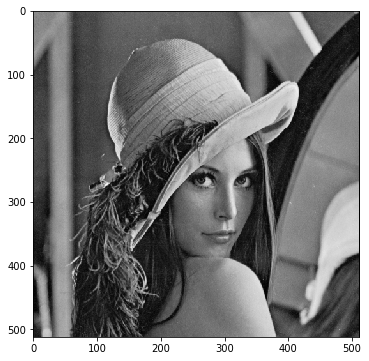

In [10]:
# Transformation matrix to shift by 2 pixels
T = np.float32([[1, 0, -2],[0, 1, 0]])
img1_green_shifted = cv2.warpAffine(img1_green_gs, T, img1_green_gs.shape[::-1])
plt.imshow(img1_green_shifted)

### d. Subtract shifted from original

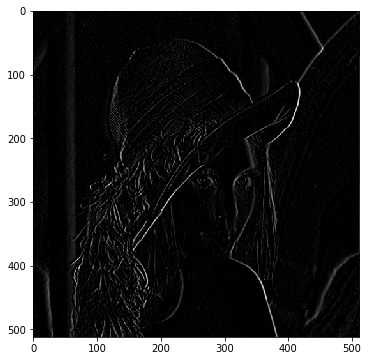

In [11]:
img1_green_diff = cv2.subtract(img1_green_gs, img1_green_shifted)
plt.imshow(img1_green_diff)

## 5. Noise

In [16]:
# Gaussian Noise
sigma = 10
noise = np.random.normal(0, sigma, img1.shape[:-1])
noise_viz_gain = 10

### a. Green channel noise

Text(0.5,1,'Noise (10x amplified)')

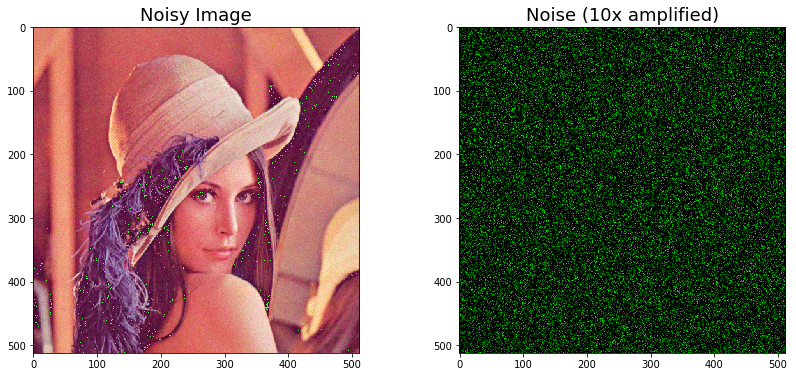

In [19]:
img1_noisy_green = img1.copy()
# Add noise
img1_noisy_green[:, :, 1] = np.add(img1_noisy_green[:, :, 1], noise, casting='unsafe')
img1_noisy_green[:, :, 1] = img1_noisy_green[:, :, 1].clip(0, 255)
# Visualize green channel noise
noise_green = np.zeros(img1.shape, dtype=int)
noise_green[:, :, 1] = noise * noise_viz_gain
noise_green[:, :, 1] = noise_green[:, :, 1].clip(0, 255)
# Plot
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img1_noisy_green)
ax[0].set_title("Noisy Image")
ax[1].imshow(noise_green)
ax[1].set_title("Noise ({}x amplified)".format(noise_viz_gain))

Text(0.5,1,'Noise (10x amplified)')

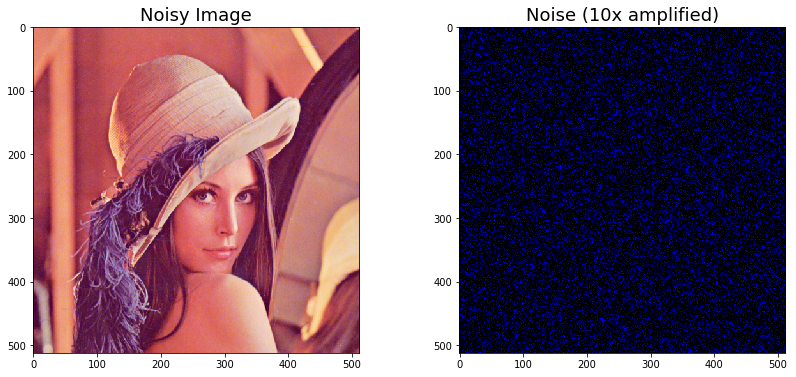

In [22]:
img1_noisy_blue = img1.copy()
# Add noise
img1_noisy_blue[:, :, 2] = np.add(img1_noisy_blue[:, :, 2], noise, casting='unsafe')
img1_noisy_blue[:, :, 2] = img1_noisy_blue[:, :, 2].clip(0, 255)
# Visualize blue channel noise
noise_blue = np.zeros(img1.shape, dtype=int)
noise_blue[:, :, 2] = noise * noise_viz_gain
noise_blue[:, :, 2] = noise_blue[:, :, 2].clip(0, 255)
# Plot
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img1_noisy_blue)
ax[0].set_title("Noisy Image")
ax[1].imshow(noise_blue)
ax[1].set_title("Noise ({}x amplified)".format(noise_viz_gain))

### c. Which noisy output looks better?
The same noise added to the green channel is more visible. This is because human vision is more sensitive to green colour. 